# Trend and Seasonality

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt

Dekompozycja szeregów czasowych opiera się na myślenie o szeregu czasowym jako kombinacji:

- trendu, 
- sezonowości, 
- szumu.


Szereg czasowy zazwyczaj składa się z części powtarzającej się i szumu:

- Level: Średnia wartość w szeregu czasowym.
- Trend: Wzrastająca lub malejąca wartość w szeregu czasowym.
- Seasonality:  powtarzający się cykl krótkoterminowy w szeregu czasowym.
- Noise : losowe zaburzenia w szeregu czasowym.

Uważa się, że szereg czasowy jest agregatem lub kombinacją tych czterech elementów.
Wszystkie szeregi czasowe mają poziom (level) i szum. Elementy trendu i sezonowości są opcjonalne.

### Additive Model

y(t) = Level + Trend + Seasonality + Noise

### Multiplicative Model

y(t) = Level * Trend * Seasonality * Noise

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Przykład
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [3]:
data = [i+randrange(10) for i in range(1,100)]
series = pd.Series(data)

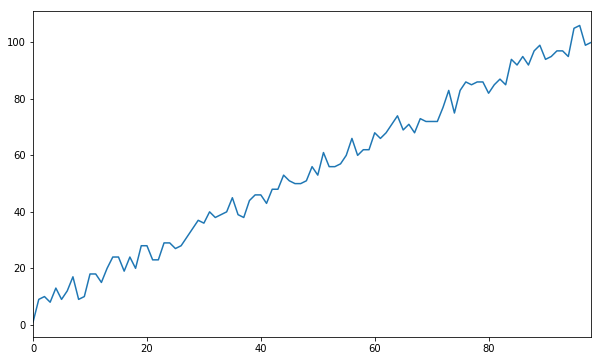

In [4]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [5]:
result = seasonal_decompose(data, model='additive', freq=1)

In [6]:
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

[  1.   9.  10.   8.  13.   9.  12.  17.   9.  10.  18.  18.  15.  20.
  24.  24.  19.  24.  20.  28.  28.  23.  23.  29.  29.  27.  28.  31.
  34.  37.  36.  40.  38.  39.  40.  45.  39.  38.  44.  46.  46.  43.
  48.  48.  53.  51.  50.  50.  51.  56.  53.  61.  56.  56.  57.  60.
  66.  60.  62.  62.  68.  66.  68.  71.  74.  69.  71.  68.  73.  72.
  72.  72.  77.  83.  75.  83.  86.  85.  86.  86.  82.  85.  87.  85.
  94.  92.  95.  92.  97.  99.  94.  95.  97.  97.  95. 105. 106.  99.
 100.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

<Figure size 864x432 with 0 Axes>

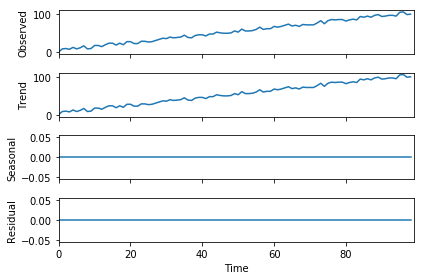

In [7]:
plt.figure(figsize=(12,6));
result.plot()
plt.show()

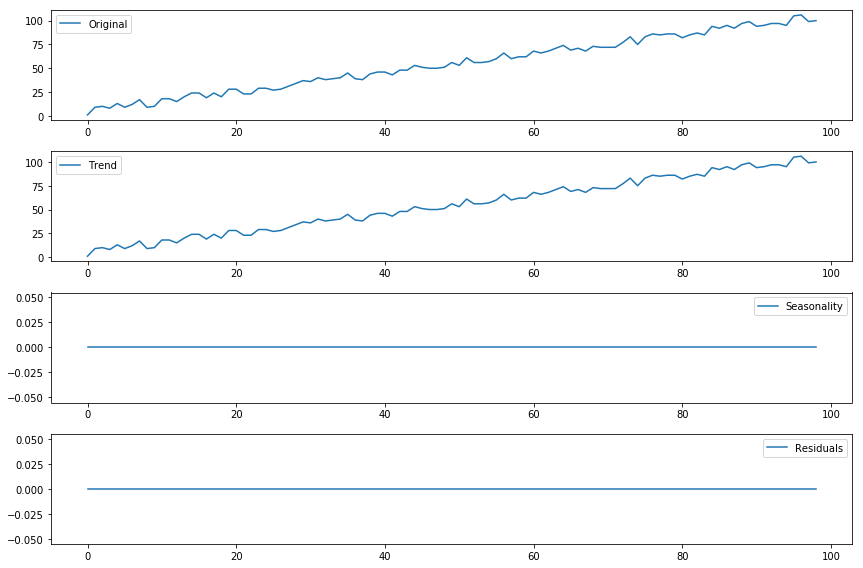

In [8]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [9]:
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)

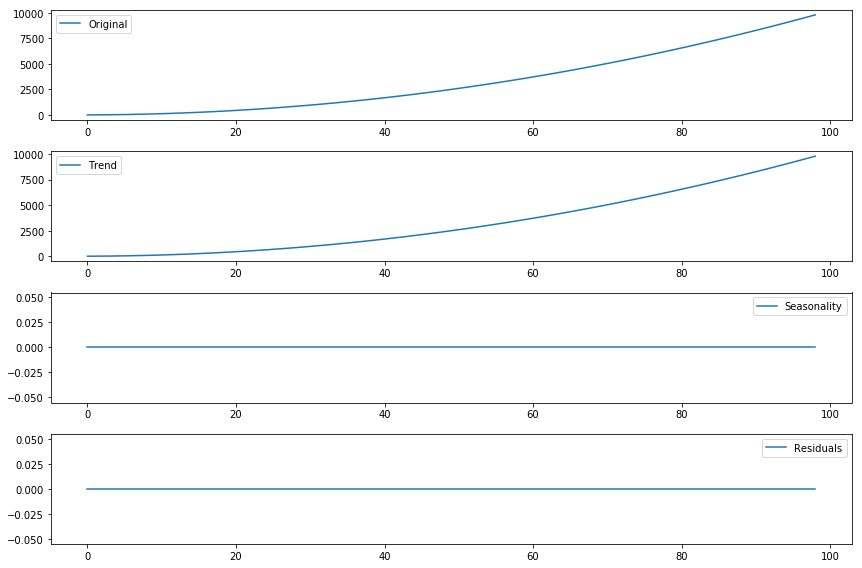

In [10]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [11]:
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
result = seasonal_decompose(series, model='additive', freq=365)

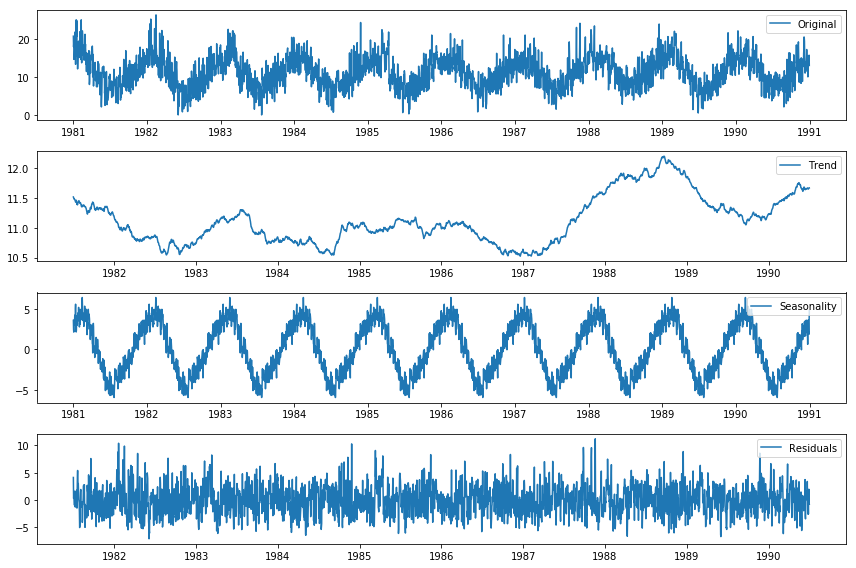

In [12]:
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
result = seasonal_decompose(series, model='additive', freq=365)

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

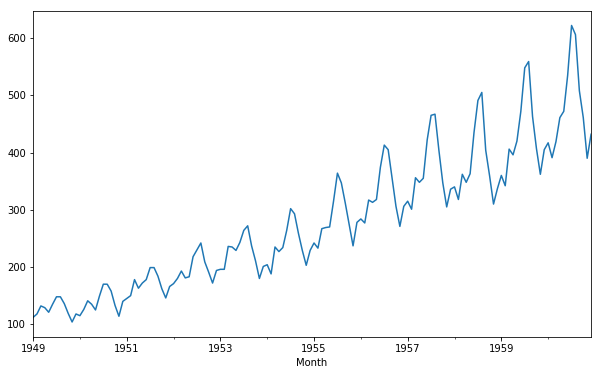

In [61]:
series = Series.from_csv('international-airline-passengers.csv', header=0)            
result = seasonal_decompose(series, model='additive')

plt.figure(figsize=(10,6));
series.plot()
plt.show()

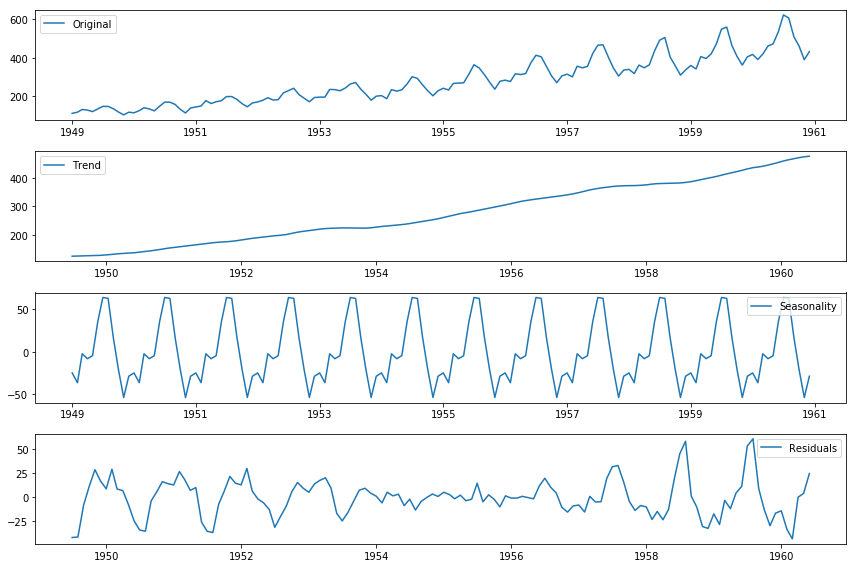

In [20]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

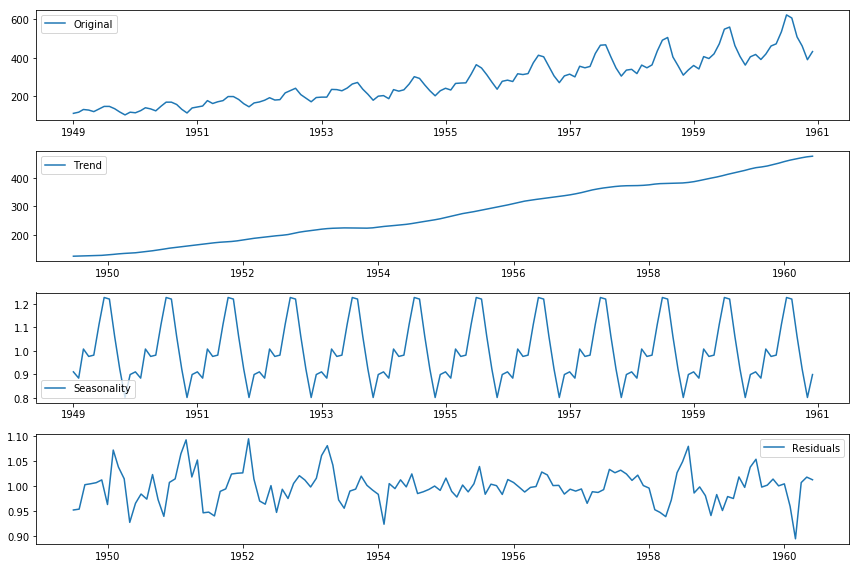

In [22]:
result = seasonal_decompose(series, model='multiplicative')

plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
from pandas.tools.plotting import autocorrelation_plot

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


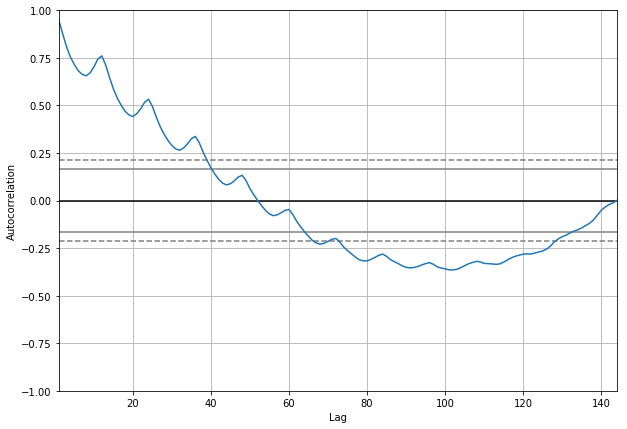

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot(series)
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


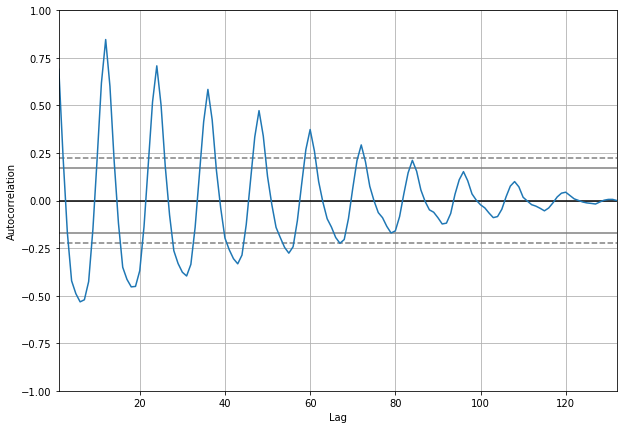

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot((result.observed - result.trend).dropna())
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


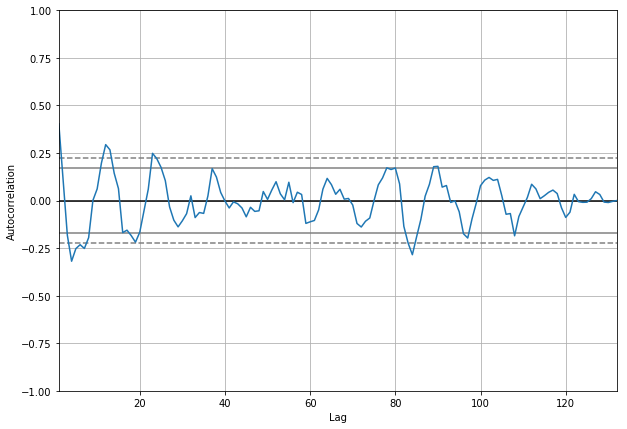

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7));
autocorrelation_plot(result.resid)
plt.show()

# res1 = result.seasonal.dropna() 
# res1 = result.resid.dropna()
# res2
# res2

In [56]:
(result.observed - result.trend).dropna()

Month
1949-07-01     21.208333
1949-08-01     20.750000
1949-09-01      8.041667
1949-10-01     -9.583333
1949-11-01    -25.000000
1949-12-01    -11.750000
1950-01-01    -16.250000
1950-02-01     -7.083333
1950-03-01      6.083333
1950-04-01     -1.416667
1950-05-01    -12.416667
1950-06-01     10.250000
1950-07-01     29.083333
1950-08-01     26.833333
1950-09-01     12.291667
1950-10-01    -15.416667
1950-11-01    -37.541667
1950-12-01    -14.708333
1951-01-01    -12.125000
1951-02-01     -9.541667
1951-03-01     16.166667
1951-04-01     -1.125000
1951-05-01      5.333333
1951-06-01      8.916667
1951-07-01     27.750000
1951-08-01     25.416667
1951-09-01      8.541667
1951-10-01    -14.833333
1951-11-01    -32.041667
1951-12-01    -14.166667
                 ...    
1958-01-01    -35.250000
1958-02-01    -59.916667
1958-03-01    -17.500000
1958-04-01    -32.000000
1958-05-01    -17.708333
1958-06-01     54.041667
1958-07-01    109.166667
1958-08-01    121.333333
1958-09-01     17.5